In [1]:
import numpy as np

### Содержание
- [Класс Perceptron](#Perceptron)

- [Реализация адаптивного линейного нейрона на Python](#Реализация-адаптивного-линейного-нейрона-на-Python)

### Perceptron

In [96]:
class Perceptron(object):
    '''Классификатор на основе персептрона.
    
    Параметры
    ---------
    eta: float
        Темп обучения (между 0.0 и 1.0)
    n_iter: int
        Проходы по тренировочному набору данных.
        
    Атрибуты
    --------
    w_: 1-мерный массив
        Весовые коэффициенты после подгонки.
    erroers_: список
        Число случаев ошибочной классификации в каждой эпохе.
        
    '''
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        '''
        Выполнить подгонку модели под тренировочные данные.
        
        Параметры
        ---------
        X: {массивоподобный}, форма = [n_samples, n_features]
            тренировоные векторы, где
            n_samples - число образцов и 
            n_features - число признаков.
        y: массиводобный, форма = [n_samples]
            Целевые значения.
            
        Возвращает
        ----------
        self: object
        
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            num_sample = 0
            for xi, target in zip(X, y):
                num_sample += 1
                print(f'Эпоха №{_ + 1}, Sample №{num_sample}')
                predict = self.predict(xi)
                loss = target - predict
                update = self.eta * loss
                print(f'\txi = {xi}, target = {target}, predict = {predict}')
                print(f'\teta = {self.eta}, loss = {loss}, update = {update}')
                w_before = self.w_.copy()
                self.w_[1:] += update * xi
                self.w_[0]  += update
                print(f'\tw_before = {w_before}, w_update = {self.w_}')
                errors      += int(update != 0.0)
                print(f'\terrors = {errors}')
                print('-' * 80)
            self.errors_.append(errors)
            print(f'Ошибки эпохи =  {self.errors_}')
            print('-' * 80)
            print()
        return self
    
    def net_input(self, X):
        '''
        Рассчитать чистый вход
        '''
        # сумматорная функция
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''
        Вернуть метку класса после единичного скачка
        '''
        # функция активации
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Тренировка модели персептрона на Iris датасете

[[обратно к содержанию](#Содержание)]

#### Чтение данных

In [37]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Графическое отображение данных Iris

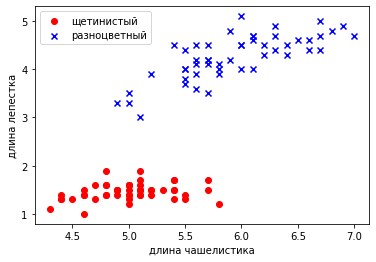

In [38]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='разноцветный')
plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')
plt.legend(loc='upper left')
plt.show()

Эпоха №1, Sample №1
	xi = [5.1 1.4], target = -1, predict = 1
	eta = 0.1, loss = -2, update = -0.2
	w_before = [0. 0. 0.], w_update = [-0.2  -1.02 -0.28]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №1, Sample №2
	xi = [4.9 1.4], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2  -1.02 -0.28], w_update = [-0.2  -1.02 -0.28]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №1, Sample №3
	xi = [4.7 1.3], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2  -1.02 -0.28], w_update = [-0.2  -1.02 -0.28]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №1, Sample №4
	xi = [4.6 1.5], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2  -1.02 -0.28], w_update = [-0.2  -1.02 -0.28]
	errors = 1
---------------------------------------------------------------------

--------------------------------------------------------------------------------
Эпоха №2, Sample №31
	xi = [4.8 1.6], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2  -0.64  0.38], w_update = [-0.2  -0.64  0.38]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №2, Sample №32
	xi = [5.4 1.5], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2  -0.64  0.38], w_update = [-0.2  -0.64  0.38]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №2, Sample №33
	xi = [5.2 1.5], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2  -0.64  0.38], w_update = [-0.2  -0.64  0.38]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №2, Sample №34
	xi = [5.5 1.4], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2  -0.64  0.38], w_update = [-0.2  -

	xi = [6.2 4.5], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2   0.22  1.68], w_update = [-0.2   0.22  1.68]
	errors = 3
--------------------------------------------------------------------------------
Эпоха №3, Sample №70
	xi = [5.6 3.9], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2   0.22  1.68], w_update = [-0.2   0.22  1.68]
	errors = 3
--------------------------------------------------------------------------------
Эпоха №3, Sample №71
	xi = [5.9 4.8], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2   0.22  1.68], w_update = [-0.2   0.22  1.68]
	errors = 3
--------------------------------------------------------------------------------
Эпоха №3, Sample №72
	xi = [6.1 4. ], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.2   0.22  1.68], w_update = [-0.2   0.22  1.68]
	errors = 3
--------------------------------------------------------------------------------
Эпоха

	errors = 1
--------------------------------------------------------------------------------
Эпоха №5, Sample №12
	xi = [4.8 1.6], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №5, Sample №13
	xi = [4.8 1.4], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №5, Sample №14
	xi = [4.3 1.1], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 1
--------------------------------------------------------------------------------
Эпоха №5, Sample №15
	xi = [5.8 1.2], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_updat

	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №6, Sample №59
	xi = [6.6 4.6], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №6, Sample №60
	xi = [5.2 3.9], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №6, Sample №61
	xi = [5.  3.5], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №6, Sample №62
	xi = [5.9 4.2], target = 1, predict = 1
	eta = 0.1, loss = 

	xi = [5.7 4.2], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №7, Sample №97
	xi = [5.7 4.2], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №7, Sample №98
	xi = [6.2 4.3], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №7, Sample №99
	xi = [5.1 3. ], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха

	xi = [4.8 1.6], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №9, Sample №32
	xi = [5.4 1.5], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №9, Sample №33
	xi = [5.2 1.5], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №9, Sample №34
	xi = [5.5 1.4], target = -1, predict = -1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
------------------------------------------------------------------------------

	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №10, Sample №96
	xi = [5.7 4.2], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №10, Sample №97
	xi = [5.7 4.2], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №10, Sample №98
	xi = [6.2 4.3], target = 1, predict = 1
	eta = 0.1, loss = 0, update = 0.0
	w_before = [-0.4  -0.68  1.82], w_update = [-0.4  -0.68  1.82]
	errors = 0
--------------------------------------------------------------------------------
Эпоха №10, Sample №99
	xi = [5.1 3. ], target = 1, predict = 1
	eta = 0.1, los

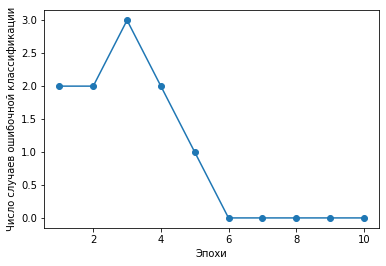

In [97]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Эпохи')
# число ошибочно классифицированных случаев во врем обновлений
plt.ylabel('Число случаев ошибочной классификации')
plt.show()

In [34]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # настроить генератор маркеров и палитру
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывести повержность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
               
    # показать образцы классов
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1, 0], y=X[y==c1, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=c1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


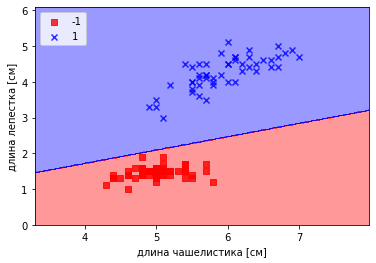

In [35]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show();

### Реализация адаптивного линейного нейрона на Python

In [121]:
class AdalineGD():
    '''Классификатор на основе ADALIN (ADAptive LInear NEuron).
    
    Параметры
    ---------
    eta: float
        Темп обучения (между 0.0 и 1.0)
    n_iter: int
        Проходы по тренировочному набору данных.
        
    Атрибуты
    --------
    w_: 1-мерный массив
        Весовые коэффициенты после подгонки.
    erroers_: список
        Число случаев ошибочной классификации в каждой эпохе.
        
    '''
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        '''
        Выполнить подгонку модели под тренировочные данные.
        
        Параметры
        ---------
        X: {массивоподобный}, форма = [n_samples, n_features]
            тренировоные векторы, где
            n_samples - число образцов и 
            n_features - число признаков.
        y: массиводобный, форма = [n_samples]
            Целевые значения.
            
        Возвращает
        ----------
        self: object
        
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        '''
        Рассчитать чистый вход
        '''
        # сумматорная функция
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''
        Рассчитать линейную активацию
        '''
        return self.net_input(X)
    
    def predict(self, X):
        '''
        Вернуть метку класса после единичного скачка
        '''
        # функция активации
        return np.where(self.activation(X) >= 0.0, 1, -1)

Построим график стоимости в сопоставлении с чилом эпох для двух разных темпов обучения:

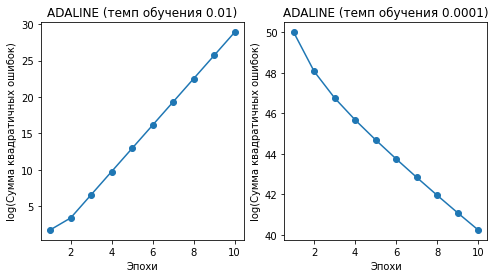

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Сумма квадратичных ошибок)')
ax[0].set_title('ADALINE (темп обучения 0.01)')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log(Сумма квадратичных ошибок)')
ax[1].set_title('ADALINE (темп обучения 0.0001)')
plt.show()

In [ ]:
60